In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm

In [36]:
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/"
g_singlep_path = "/home/haue/repositories/Masters/data/gamma/Al/withbeta"
bgpath =  "/home/haue/repositories/Masters/data/sorted/background"

#outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
g_singlep_files = glob.glob(os.path.join(g_singlep_path, "*mlio.root"))
bgfiles = glob.glob(os.path.join(bgpath, "*.root"))

#Files to be analyzed 
Analysis_files = Al_files


upscale = 1/0.34
scale =  4.993289447838043 # ratio between total solid angle coverage and solid angle coverage of id3 to account for lack of detection of beta particles
id3scale = 100/6.795917343263473

def weighted_mean(values, errors):
    values = np.asarray(values)
    errors = np.asarray(errors)
    weights = 1.0 / (errors**2)
    mean = np.sum(weights * values) / np.sum(weights)
    err_mean = np.sqrt(1.0 / np.sum(weights))
    return mean, err_mean

In [3]:

Eb = np.array([])
for batch in uproot.iterate(Analysis_files, expressions=["E"],
            cut=f"(pb)"):
    Eb = np.append(Eb, ak.flatten(batch.E))
E = np.array([])
for batch in uproot.iterate(Analysis_files, expressions=["E"]):
    E = np.append(E, ak.flatten(batch.E))

41355 (203)   526 (23)    1.272 (0.056)
2239 (47)   37 (6)    1.653 (0.274)
9153 (96)   133 (12)    1.453 (0.127)

The deduced beta efficiency of id3 is 1.313(50)


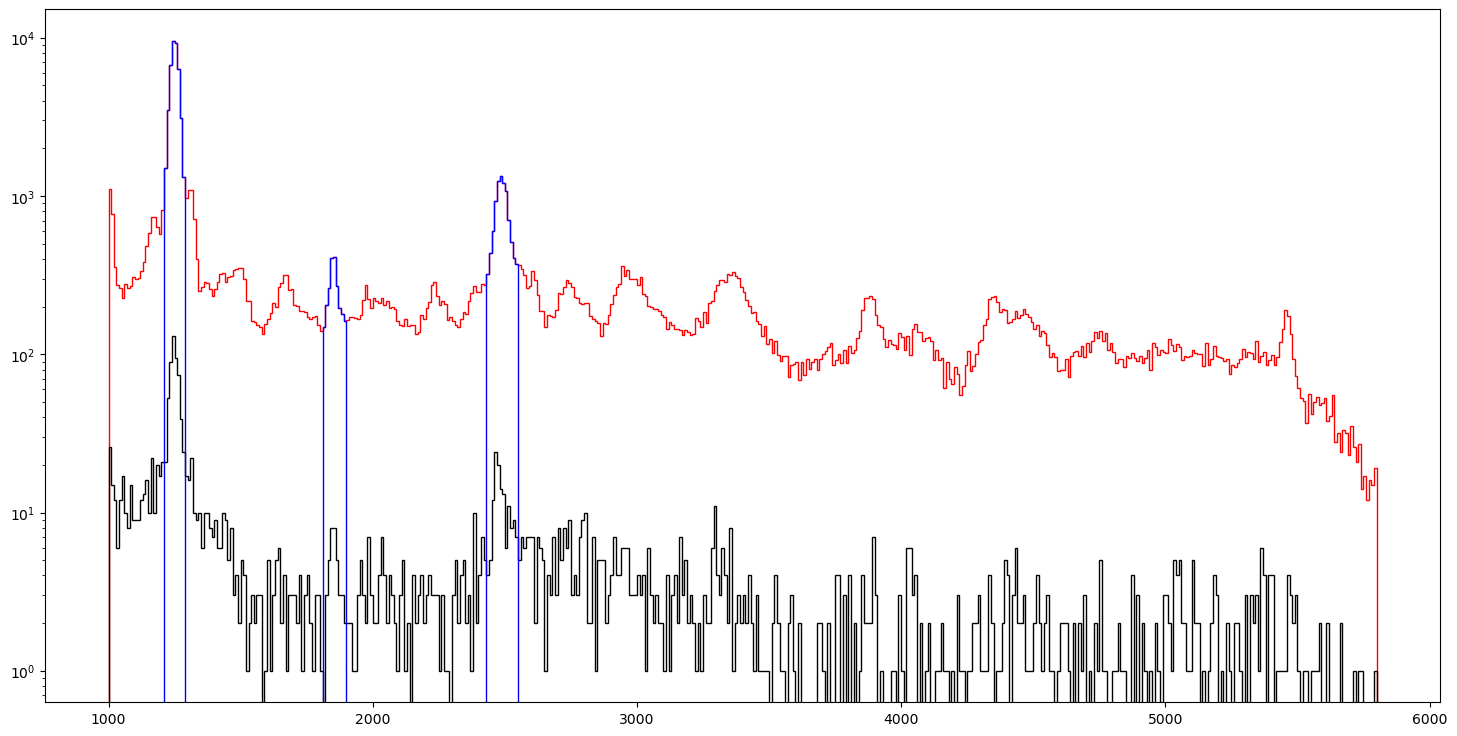

In [43]:
plt.figure(figsize=(18,9))
plt.hist(E, bins=np.arange(1000,5800+10, 10), histtype='step', color='r')
plt.hist(Eb, bins=np.arange(1000,5800+10, 10), histtype='step', color='k')

intervals = [(1210,1290), (1810,1900),(2430,2550)]
effs = []; effs_err = []
for inter in intervals:
    plt.hist(E, bins=np.arange(inter[0],inter[1]+10, 10), histtype='step', color='b')
    ys, xs = np.histogram(E, bins=np.arange(inter[0],inter[1]+10,10))
    ysb, xsb = np.histogram(Eb, bins=np.arange(inter[0],inter[1]+10,10))
    ys_err = np.sqrt(np.sum(ys))
    ysb_err = np.sqrt(np.sum(ysb))
    ys = np.sum(ys)
    ysb = np.sum(ysb)
    print(ys,f"({ys_err:.0f})  ", ysb,f"({ysb_err:.0f})   ", f"{ysb/ys*100:.3f}",f"({np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2):.3f})")
    effs.append(ysb/ys*100)
    effs_err.append(np.sqrt((1/ys *100)**2 * ysb_err**2+(ysb/ys**2 *100)**2 * ys_err**2))
plt.yscale('log')
print()
w,we = weighted_mean(effs,effs_err)
print(f"The deduced beta efficiency of id3 is {w:.3f}({we*1e3:.0f})")